In [13]:
%reload_ext autoreload
%autoreload 1

# imports
import numpy as np 
import matplotlib.pyplot as plt  

%aimport kml.regression
import kml.regression as reg

Let y = sin(x) + noise(normal dist)

In [14]:
# Generate x, y
x = np.arange(0, 3 * np.pi, 2.) 
z = np.arange(0, 3 * np.pi, 0.03) 
y = np.sin(x) + 0.3*np.random.normal(size=len(x))
plt.xkcd()

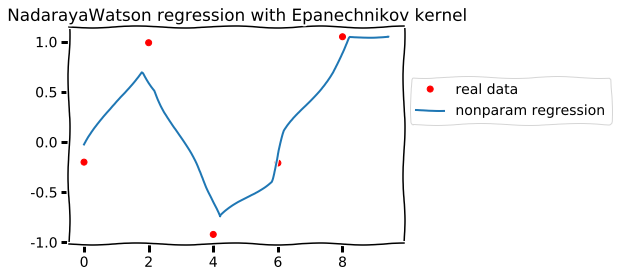

In [15]:
# NodorayWatson Epanechnikov
est = np.array([])

h = 2.2

for i in z:
    est = np.append(est, [reg.NodorayWatson(i, x, y, h=h)])
plt.plot(x, y, 'ro', label='real data')
plt.plot(z, est, label='nonparam regression') 
plt.title('NadarayaWatson regression with Epanechnikov kernel')
plt.legend(bbox_to_anchor=(1, 0.8))
plt.show() 

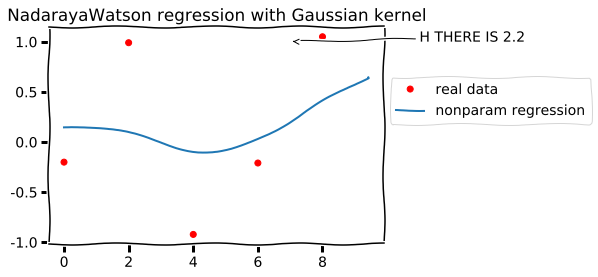

In [16]:
# NodorayWatson Gaussian
est = np.array([])
for i in z:
    est = np.append(est, [reg.NodorayWatson(i, x, y, h=h, kernel=reg.Kernel.Gaussian)])
plt.plot(x, y, 'ro', label='real data')
plt.plot(z, est, label='nonparam regression') 
plt.title('NadarayaWatson regression with Gaussian kernel')
plt.annotate(
    'H THERE IS 2.2',
    xy=(7, 1), arrowprops=dict(arrowstyle='->'), xytext=(11, 1))
plt.legend(bbox_to_anchor=(1, 0.8))
plt.show() 

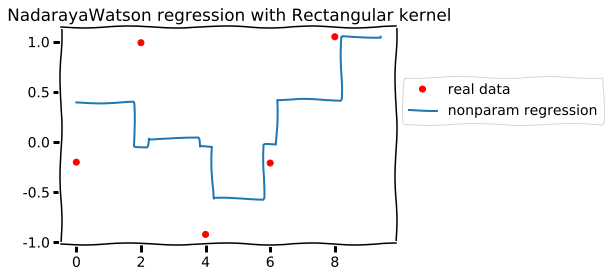

In [17]:
# NodorayWatson Reactangular
est = np.array([])
for i in z:
    est = np.append(est, [reg.NodorayWatson(i, x, y, h=h, kernel=reg.Kernel.Rectangular)])

plt.plot(x, y, 'ro', label='real data')
plt.plot(z, est, label='nonparam regression') 
plt.title('NadarayaWatson regression with Rectangular kernel')
plt.legend(bbox_to_anchor=(1, 0.8))
plt.show() 

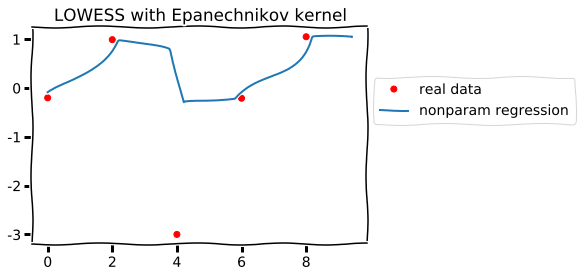

Gamma = [0.3906739  0.24197072 0.00401935 0.38995274 0.22742165]


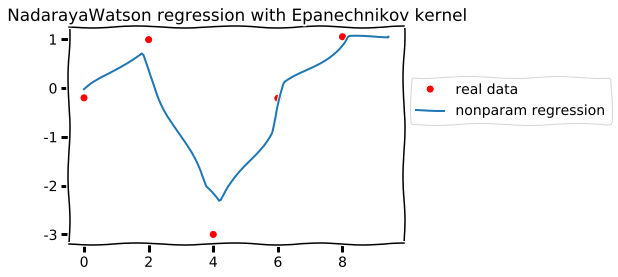

In [18]:
y[2] = -3
gamma = reg.LOWESS(x, y, h=h, sigma=1, kernel=reg.Kernel.Rectangular, metric=reg.Metric.Euclidean)

plt.subplot()
est = np.array([])
for i in z:
    W = reg.Weights(i, x, y, h=h, kernel=reg.Kernel.Epanechnikov, metric=reg.Metric.Euclidean)
    est = np.append(est, [reg.NodorayWatson(i, x, y, h=h, weights=W*gamma)])
plt.plot(x, y, 'ro', label='real data')
plt.plot(z, est, label='nonparam regression') 
plt.title('LOWESS with Epanechnikov kernel')
plt.legend(bbox_to_anchor=(1, 0.8))
plt.show() 
print("Gamma = %s" % gamma)

est = np.array([])
for i in z:
    est = np.append(est, [reg.NodorayWatson(i, x, y, h=h)])
plt.plot(x, y, 'ro', label='real data')
plt.plot(z, est, label='nonparam regression') 
plt.title('NadarayaWatson regression with Epanechnikov kernel')
plt.legend(bbox_to_anchor=(1, 0.8))

plt.show() 
